In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,Activation,MaxPooling2D
%matplotlib inline

Using TensorFlow backend.


In [2]:
dogs_train_path="Downloads/dogs-cats-images/dataset/training_set/dogs/"
dogs_train_path2 = "Downloads/train/DOG /"
cats_train_path="Downloads/dogs-cats-images/dataset/training_set/cats/"
cats_train_path2="Downloads/train/CAT/"
dogs_test_path="Downloads/dogs-cats-images/dataset/test_set/dogs/"
cats_test_path="Downloads/dogs-cats-images/dataset/test_set/cats/"

In [3]:
#testing some functions
s=cv2.imread(dogs_train_path+"dog.1.jpg")
s.shape

(499, 327, 3)

In [4]:
print(s)

[[[211 224 238]
  [137 153 169]
  [ 98 116 139]
  ...
  [ 82 102 133]
  [ 77  97 128]
  [ 76  96 127]]

 [[219 234 250]
  [137 154 173]
  [ 86 108 133]
  ...
  [ 64  84 115]
  [ 59  80 111]
  [ 59  79 110]]

 [[210 230 248]
  [127 148 170]
  [ 77 101 129]
  ...
  [ 33  54  85]
  [ 29  53  83]
  [ 32  53  84]]

 ...

 [[244 255 255]
  [241 255 254]
  [237 250 252]
  ...
  [224 240 239]
  [223 239 238]
  [223 239 238]]

 [[244 255 255]
  [242 255 255]
  [239 253 252]
  ...
  [232 246 245]
  [231 245 244]
  [231 245 244]]

 [[244 255 255]
  [243 255 255]
  [241 255 254]
  ...
  [237 251 250]
  [235 249 248]
  [236 250 249]]]


In [5]:
q="dog.1.jpg"
q.split(".")[0]

'dog'

In [6]:
#no of data 
print(len(os.listdir(dogs_train_path)))

4000


In [7]:
print(len(os.listdir(dogs_test_path)))

1000


In [14]:
#loading the training data
n=4000
size=(96,96)
x=[]
y=[]

In [15]:
i=1
while(i<=n):
    file = "dog." + str(i) + ".jpg"
    file_path = dogs_train_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    x.append(img)
    label=file.split(".")[0]
    y.append(label)
    i+=1
i=0
n=12499
while(i<=n):
    file = "dog." + str(i) + ".jpg"
    file_path = dogs_train_path2 + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    x.append(img)
    label=file.split(".")[0]
    y.append(label)
    i+=1

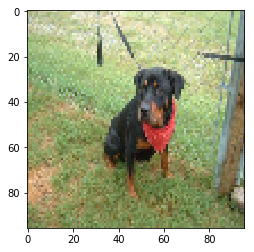

In [16]:
plt.imshow(x[15323])

In [17]:
n=4000
i=1
while(i<=n):
    file="cat." + str(i) + ".jpg"
    file_path=cats_train_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    x.append(img)
    label=file.split(".")[0]
    y.append(label)
    i+=1
n=12499
i=0
while(i<=n):
    file="cat." + str(i) + ".jpg"
    file_path=cats_train_path2 + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    x.append(img)
    label=file.split(".")[0]
    y.append(label)
    i+=1


In [18]:
x = np.array(x)

In [19]:
x.shape

(33000, 96, 96, 3)

In [21]:
y = np.array(y)
y.shape

(33000,)

In [22]:
#loading the testing data
unseen_x=[]
unseen_y=[]
n=5000
size=(96,96)


In [23]:
i=4001
while(i<=n):
    file="dog." + str(i) + ".jpg"
    file_path=dogs_test_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    unseen_x.append(img)
    label=file.split(".")[0]
    unseen_y.append(label)
    i+=1
    
i=4001
while(i<=n):
    file ="cat."+str(i)+".jpg"
    file_path=cats_test_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    unseen_x.append(img)
    label = file.split(".")[0]
    unseen_y.append(label)
    i+=1


In [24]:
unseen_x=np.array(unseen_x)
unseen_y=np.array(unseen_y)

In [25]:
unseen_x.shape

(2000, 96, 96, 3)

In [26]:
print(x.shape)

(33000, 96, 96, 3)


In [27]:
unseen_x=shuffle(unseen_x,random_state=7)
unseen_y=shuffle(unseen_y,random_state=7)
print(unseen_x.shape)
print(unseen_y.shape)

(2000, 96, 96, 3)
(2000,)


In [28]:
import matplotlib.gridspec as gridspec

In [29]:
nb_classes = 2
encoder = LabelEncoder()
encoder_y = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(encoder_y,nb_classes)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y_onehot, test_size=0.25, random_state=42,stratify=y_onehot)


In [31]:
print(x_train.shape)
print(y_train.shape)

(24750, 96, 96, 3)
(24750, 2)


In [32]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

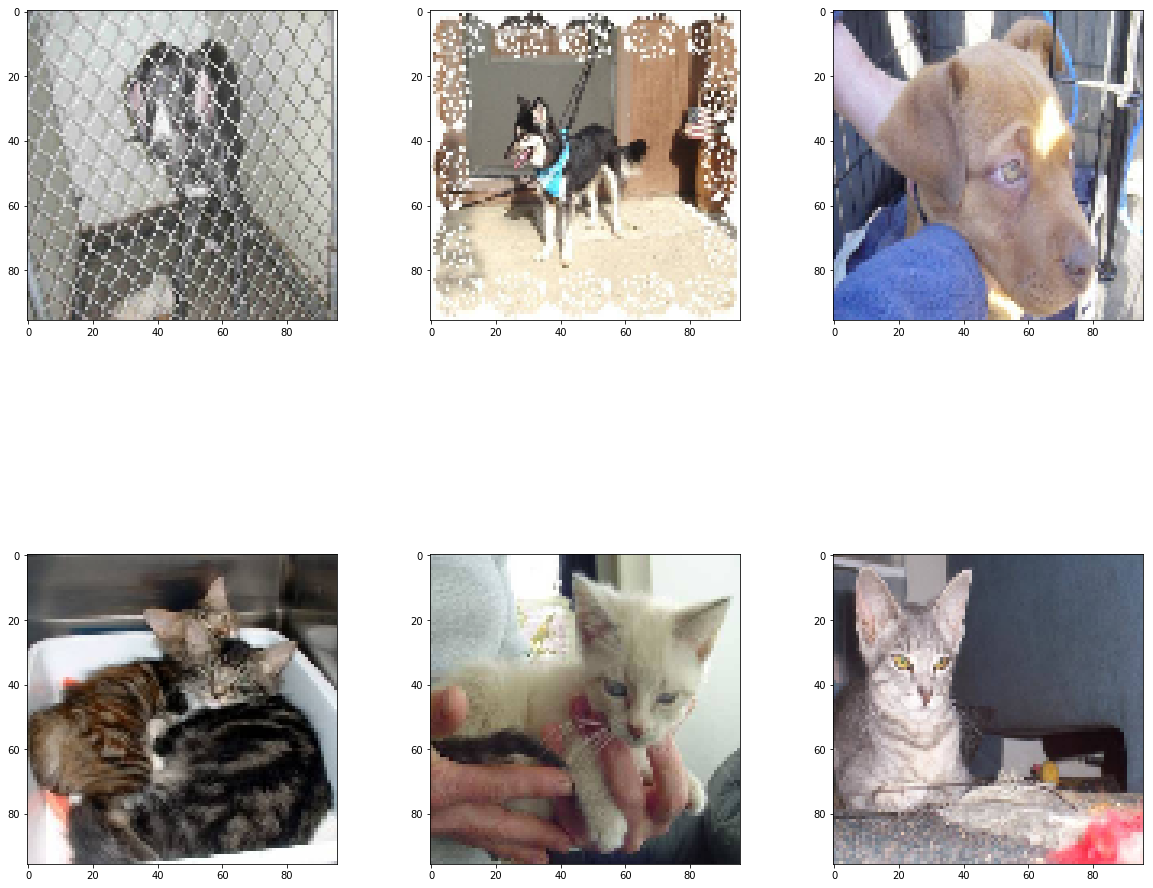

In [33]:
plt.figure(figsize=(20,20))
gsl = gridspec.GridSpec(2,3)
gsl.update(wspace = 0.3 , hspace = 0.0001)
for i in range(0,6):
    plt.subplots_adjust(wspace = 0.4)
    axl = plt.subplot(gsl[i])
    if(i<3):
        axl.imshow(unseen_x[i])
        plt.imshow(x[i+200])
    else:
        plt.imshow(x[-i-50])

In [34]:
## model 1

model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 10)       

In [35]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=64,epochs=20,callbacks=[checkpoint])

Train on 24750 samples, validate on 8250 samples
Epoch 1/20
24750/24750 [==============================] - 140s 6ms/step - loss: 1.1905 - accuracy: 0.5626 - val_loss: 0.6580 - val_accuracy: 0.6062
Epoch 2/20


/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


24750/24750 [==============================] - 139s 6ms/step - loss: 0.6381 - accuracy: 0.6361 - val_loss: 0.6276 - val_accuracy: 0.6407
Epoch 3/20
24750/24750 [==============================] - 135s 5ms/step - loss: 0.5938 - accuracy: 0.6799 - val_loss: 0.5685 - val_accuracy: 0.7113
Epoch 4/20
24750/24750 [==============================] - 136s 5ms/step - loss: 0.5494 - accuracy: 0.7256 - val_loss: 0.5354 - val_accuracy: 0.7341
Epoch 5/20
24750/24750 [==============================] - 135s 5ms/step - loss: 0.5086 - accuracy: 0.7511 - val_loss: 0.4914 - val_accuracy: 0.7633
Epoch 6/20
24750/24750 [==============================] - 135s 5ms/step - loss: 0.4683 - accuracy: 0.7750 - val_loss: 0.4746 - val_accuracy: 0.7789
Epoch 7/20
24750/24750 [==============================] - 132s 5ms/step - loss: 0.4386 - accuracy: 0.7966 - val_loss: 0.4671 - val_accuracy: 0.7789
Epoch 8/20
24750/24750 [==============================] - 134s 5ms/step - loss: 0.4047 - accuracy: 0.8171 - val_loss: 0.453

In [36]:
model.evaluate(x_test,y_test)

8250/8250 [==============================] - 14s 2ms/step


[0.5153954651716983, 0.8271515369415283]

In [37]:
import matplotlib.gridspec as gridspec

In [38]:
cls = ['Cat','Dog']
def get_preds(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = cls[idx]
    return lab,conf

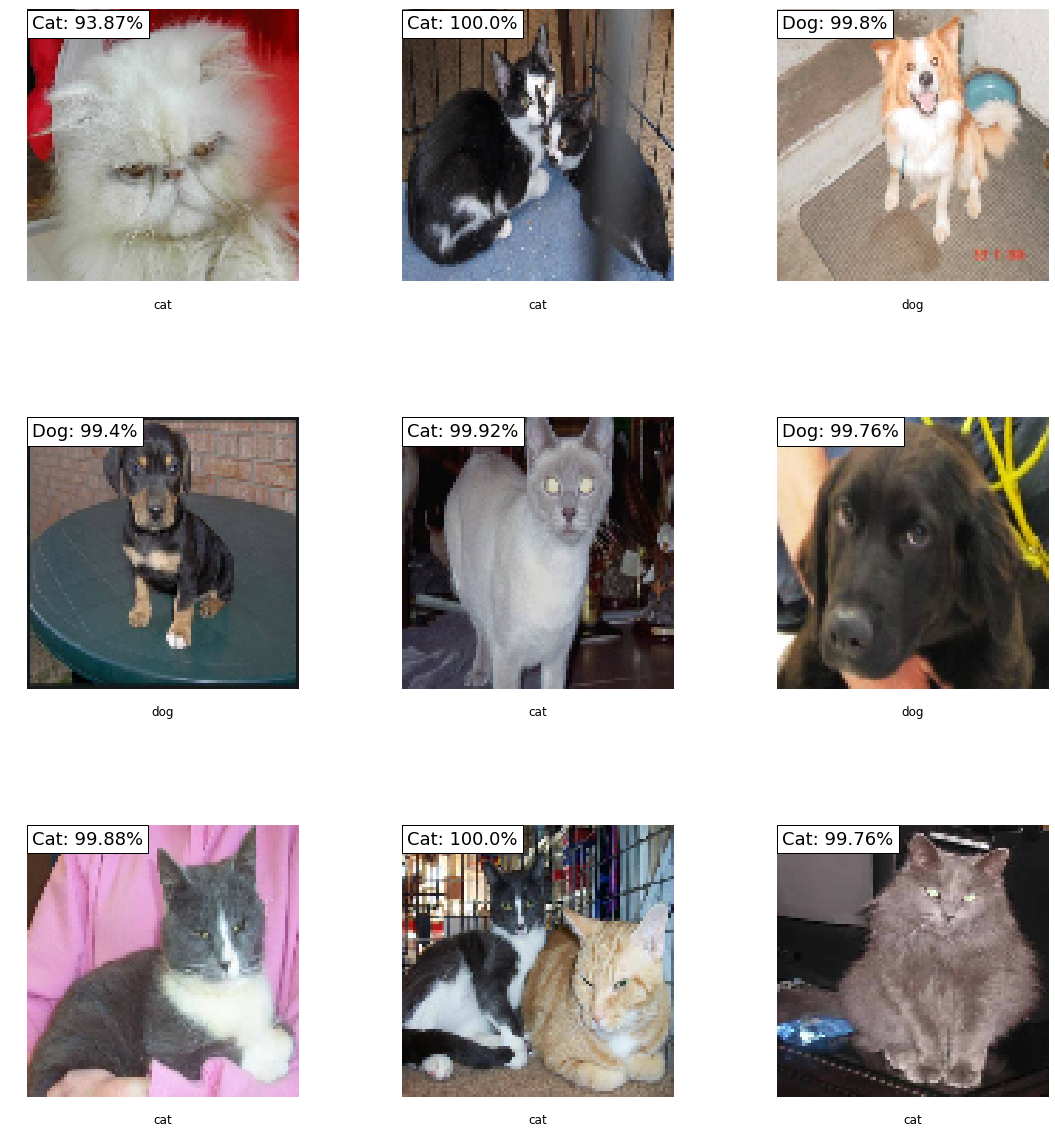

In [39]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i])


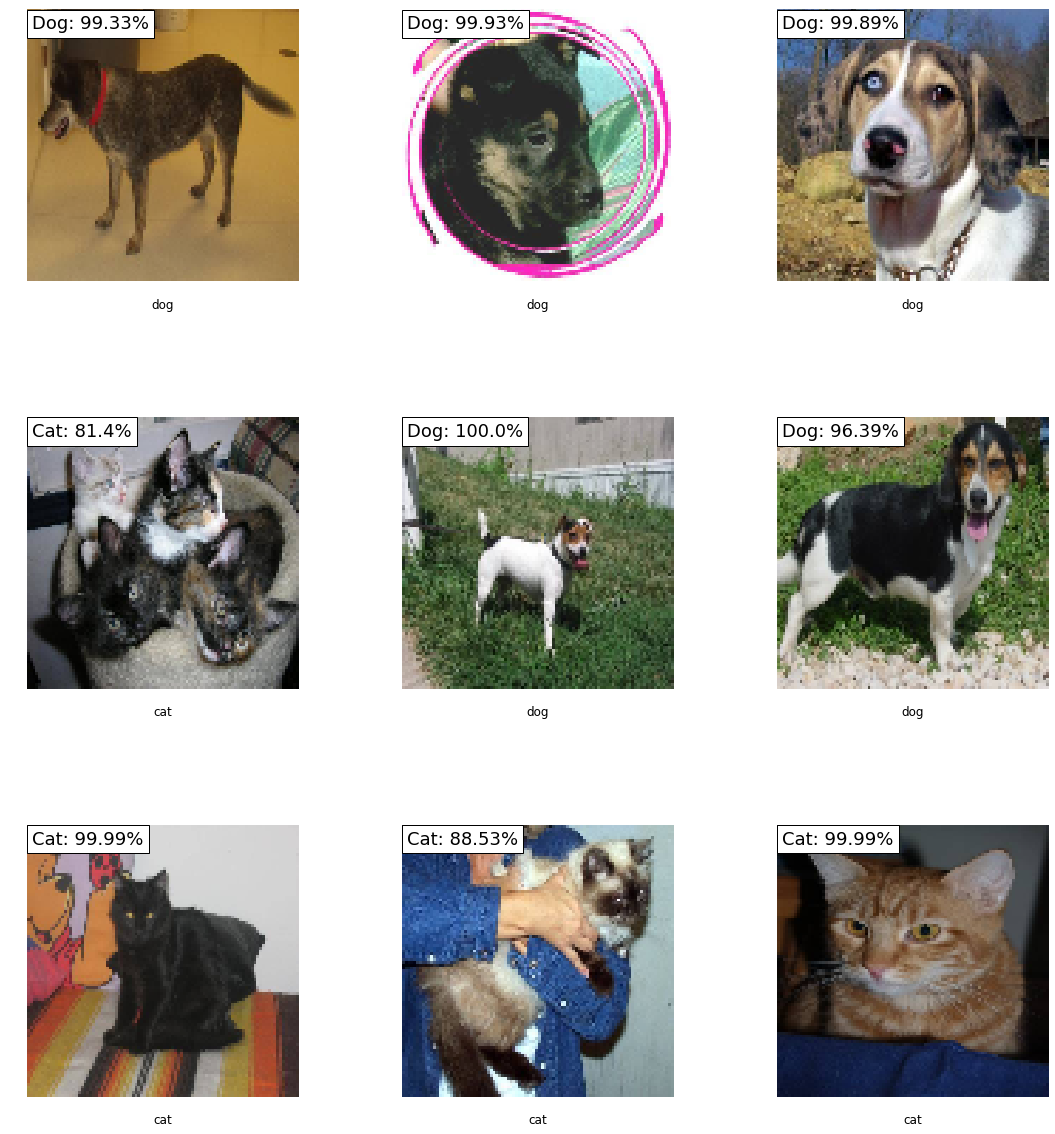

In [40]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i+100]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i+100],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i+100])


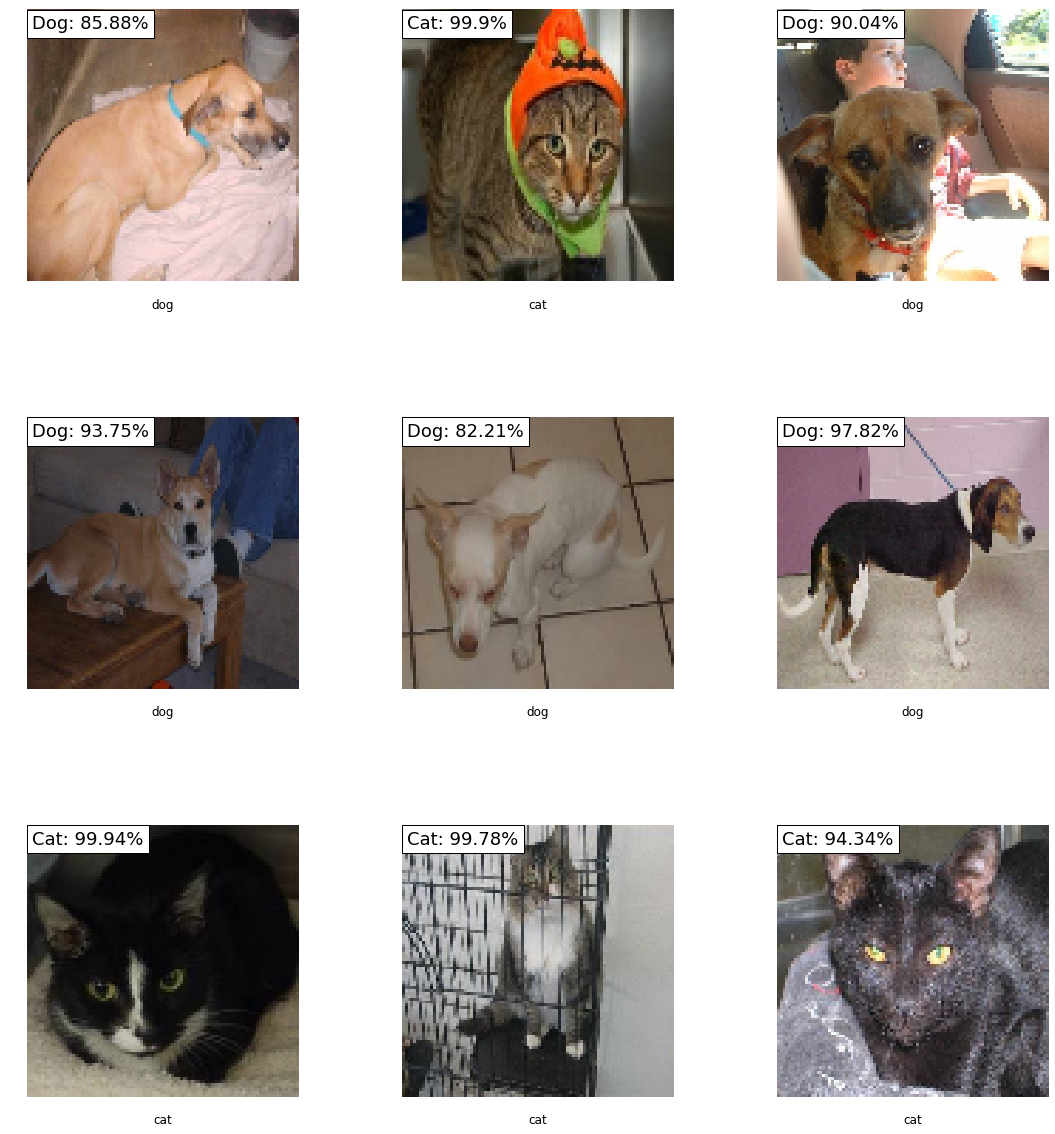

In [41]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i+200]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i+200],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i+200])


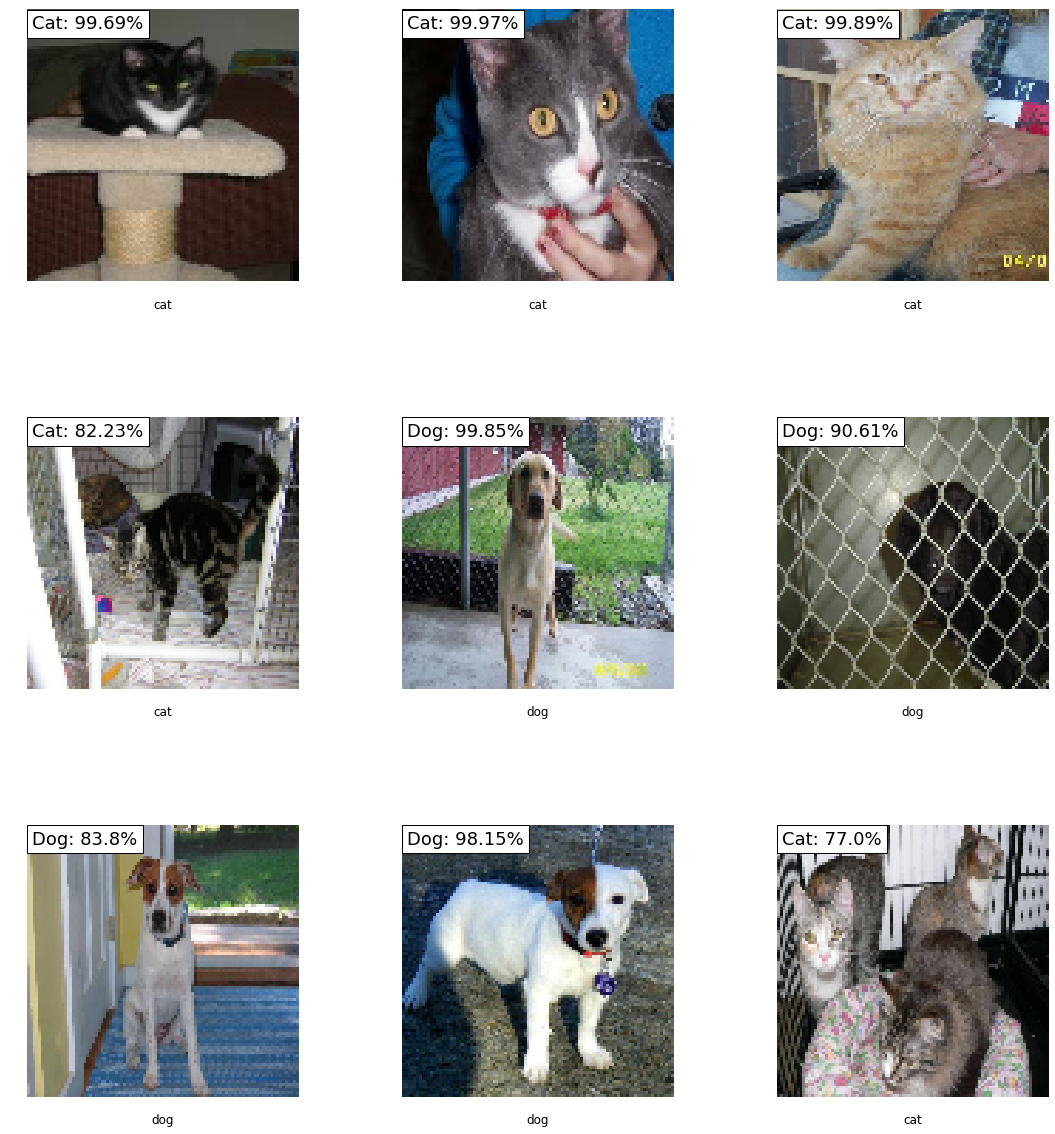

In [42]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i+500]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i+500],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i+500])


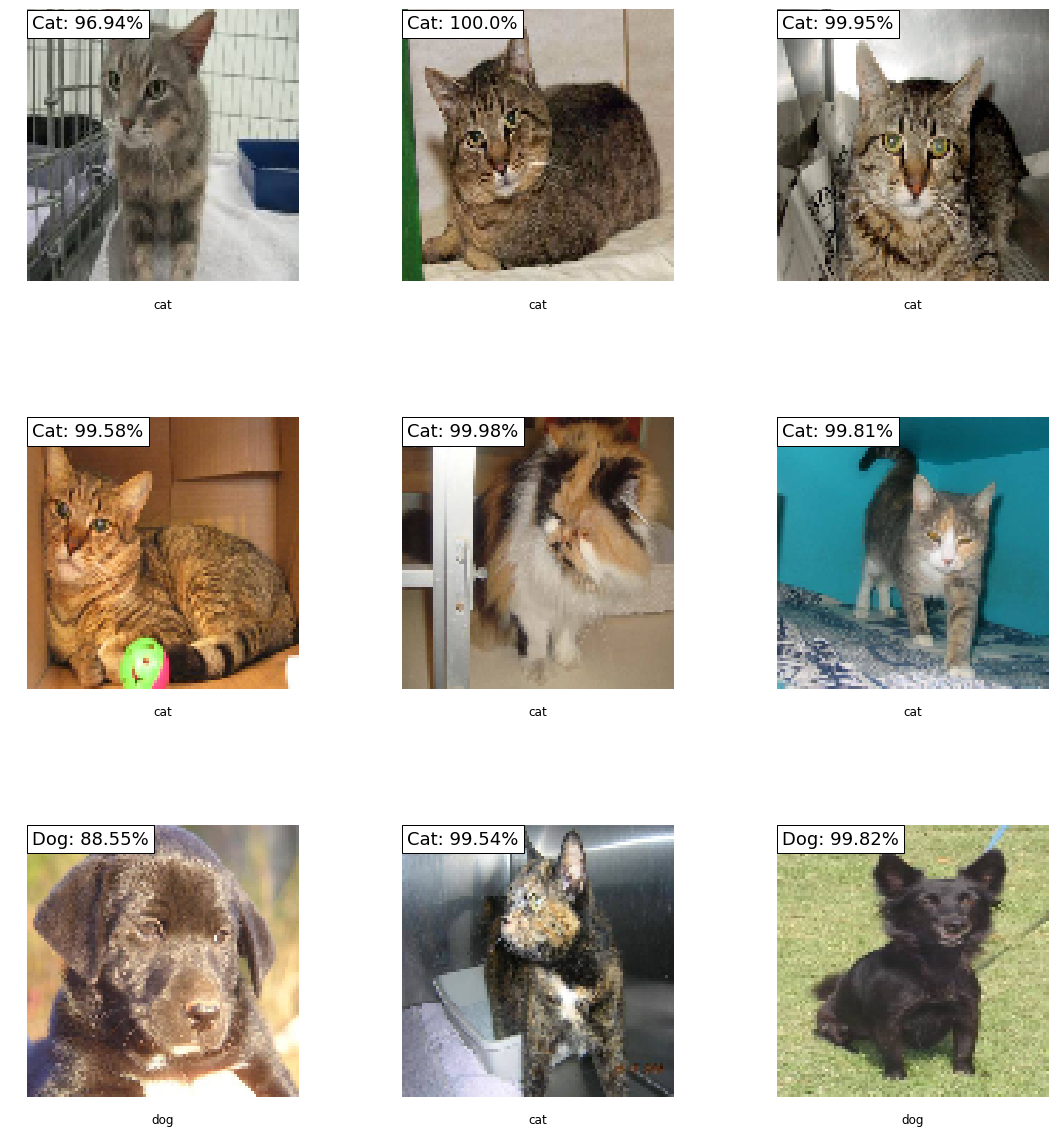

In [45]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 9):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i+1700]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i+1700],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i+1700])
